In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy

In [3]:
path = r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/02-Data'
prepared_data_fodler = r'02-Prepared_Data'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, prepared_data_fodler, 'ords_prods_merge-4.8.pkl'))

In [5]:
ords_prods_merge.shape

(32404859, 20)

## Bar Chart  

Creating a bar chart in a dataframe follows a similar procedure to that of printing the frequency for a specific column, the only difference being that the result will be visual rather than just a table of values.  

Let’s try creating one for your `orders_day_of_week` column.

In [6]:
ords_prods_merge.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,13.4,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,3.6,Low-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer


`plot.bar()` tells python to look for the `bar()` function within the `plot` module.  
It is important that you run the function on the frequency of the column you want to plot the chart for (after the `value_counts()`) otherwise running it onto the column itself will take forever to calculate.

In [7]:
# wrong approach as it will take forever to calculate
# ords_prods_merge['orders_day_of_week'].plot.bar()

### WARNING 

The first approach here to find crete a bar chart of the `orders_day_of_week` is not correct.  

WHY?  

Because we don't sort the index of the `value_conts` method, but we hard coded the names of the days of the week in order from Sat (index 0) to Fri (index 6).

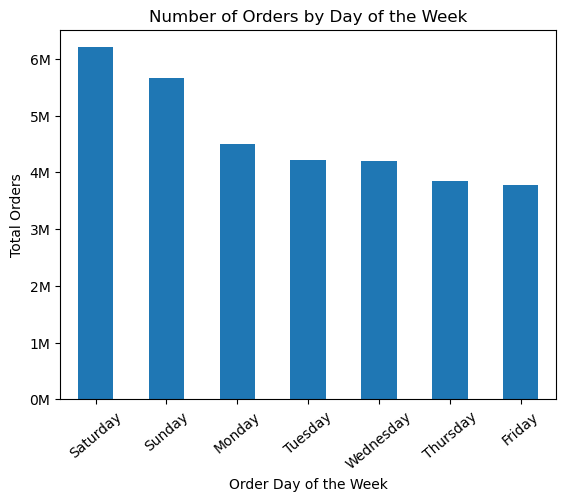

In [44]:
# misleading approach
def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'

ax = ords_prods_merge['orders_day_of_week'].value_counts(dropna = False).plot.bar()

day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ax.set_xticklabels(day_names, rotation=40)
ax.set_xlabel('Order Day of the Week')
ax.set_ylabel('Total Orders')
ax.set_title('Number of Orders by Day of the Week')

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


We need to sort the index of the `value_counts` method to matches the hard coded days in the `day_names` variable. 

In [9]:
ords_prods_merge['orders_day_of_week'].value_counts(dropna=False).sort_index(ascending=True)

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

As you can see in the cell above, now the index has been sorted. We can now create the plot with the sorted index.

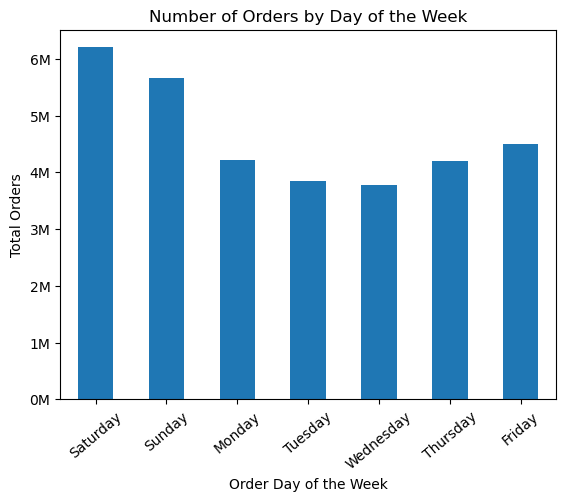

In [45]:
bar = ords_prods_merge['orders_day_of_week'].value_counts(dropna=False).sort_index(ascending=True).plot.bar()
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
bar.set_xticklabels(day_names, rotation=40)
bar.set_xlabel('Order Day of the Week')
bar.set_ylabel('Total Orders')
bar.set_title('Number of Orders by Day of the Week')

bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


To make your bars more distinct, you can also change their color.  
Doing so is as easy as adding a color argument in your `plot.bar()` function and listing the colors you want in order:

<Axes: xlabel='orders_day_of_week'>

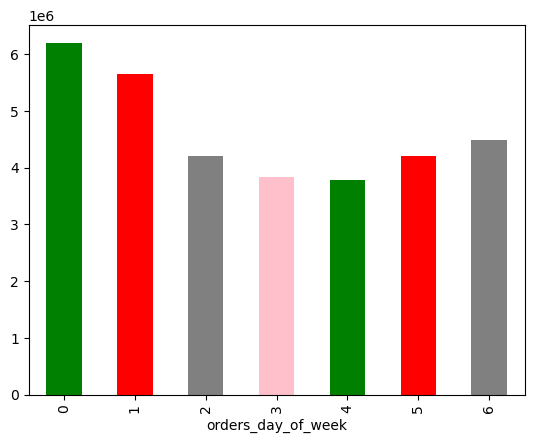

In [11]:
ords_prods_merge['orders_day_of_week'].value_counts(dropna=False).sort_index(ascending=True).plot.bar(color=['green', 'red','grey', 'pink'])

### Exporting Charts

The code you used above generated a preview for your visualization but didn’t actually save it in Jupyter’s memory.  
You’ll need to save it to a variable:

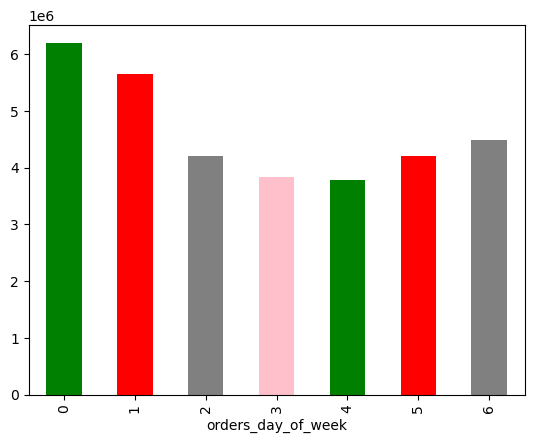

In [12]:
bar = ords_prods_merge['orders_day_of_week'].value_counts(dropna=False).sort_index(ascending=True).plot.bar(color=['green', 'red','grey', 'pink'])

To access the bar char visually we need to use the `figure` property of the object where it was saved.

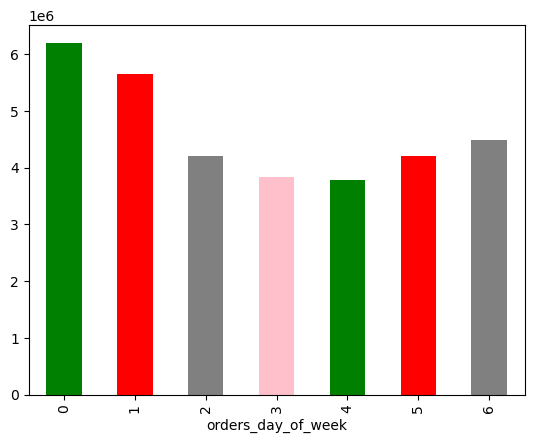

In [13]:
bar.figure

To export it outside of Jupyter in the form of an image file we'll use the `figure.savefig()` function:

In [14]:
path_vidz = r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/04-Analysis/Visualizations'
bar.figure.savefig(os.path.join(path_vidz, 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots  

**Histograms** are used to show the density of a continuous variable, in other words, the distribution of observations per their occurrence in a data set.  

This is different from bar charts as bar charts organize observations according to some category. That’s why bar charts are good for categorical data and histograms are more appropriate for continuous data.  

Let’s try creating a histogram of the `prices` column:

<Axes: ylabel='Frequency'>

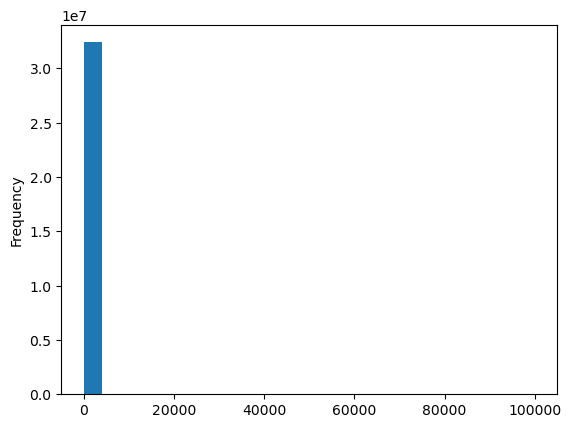

In [15]:
ords_prods_merge['prices'].plot.hist(bins = 25)

Something doesn’t seem right here. You should have gotten 25 bars (one for each bin). Instead, however, you’ve gotten one single column.  
You ran the `describe()` function against your `prices` column and produced the following output:

In [16]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Do you notice something odd in the maximum value? To further investigate, you could also conduct a few checks for each specific statistic:

In [17]:
ords_prods_merge['prices'].mean()

11.980225638383416

In [18]:
ords_prods_merge['prices'].median()

7.4

In [19]:
ords_prods_merge['prices'].max()

99999.0

While the mean and median are between *7* and *12* (relatively realistic), the max value yields a strange result. How could an item cost *$99,999.00*?  
This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking your histogram.  
Having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar  
and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.  

#### Scatterplot to the rescue  

Normally, you’d use scatterplots to investigate the relationship between two variables. However, when conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers.  

#### NB:  
Creating a scatterplot using the same variable for both axes, often called a "diagonal" scatterplot or "identity" plot, might seem unusual at first, but it can actually provide valuable insights in certain scenarios, particularly in exploratory data analysis and visualization. Here are some reasons why you might want to create such a plot:  

1. **Identifying Relationships**: While scatterplots typically show the relationship between two different variables, a diagonal scatterplot can help you visually identify patterns or relationships within a single variable. This can be useful for detecting outliers, clusters, or other patterns in the data that might not be immediately apparent from summary statistics or histograms  

2. **Data Distribution**: A diagonal scatterplot can provide a visual representation of the distribution of values for a single variable. You can quickly see the spread and concentration of data points along the diagonal line, which can be useful for understanding the data distribution and identifying any skewness or unusual patterns  

3. **Data Quality Checks**: Diagonal scatterplots can also be helpful for identifying data quality issues such as duplicate values, measurement errors, or missing values. Unusual patterns or clusters along the diagonal line might indicate data anomalies that require further investigation

<Axes: xlabel='prices', ylabel='prices'>

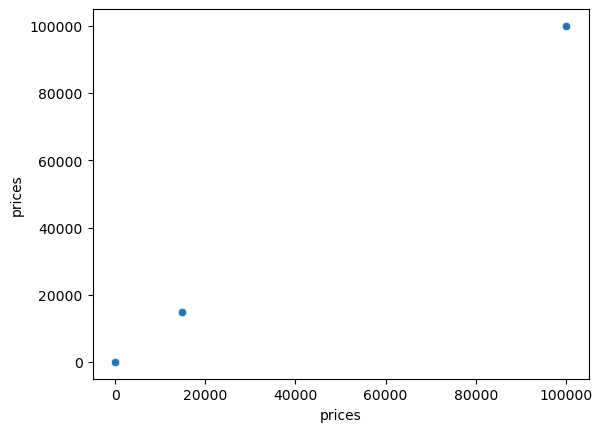

In [20]:
sns.scatterplot(ords_prods_merge, x = 'prices', y = 'prices')

The **mean** of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.  

Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item.  
If you imagined the maximum price anyone would pay in a supermarket were around *$100*, then anything above that amount could be considered an outlier.

In [21]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag
347,43,21553,6,1,39630,14,5,17,4.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-Range,regular_days,average_orders,14,regular_customer,high_spender,frequent_customer
9177,950,21553,20,0,187854,16,1,11,16.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-Range,busiest_days,most_orders,30,regular_customer,high_spender,regular_customer
10798,1115,21553,14,1,168014,15,6,14,30.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-Range,regular_days,most_orders,21,regular_customer,high_spender,frequent_customer
11147,1155,21553,18,1,103747,22,1,13,12.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-Range,busiest_days,most_orders,27,regular_customer,high_spender,frequent_customer
11769,1220,21553,19,0,23475,3,0,17,26.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-Range,busiest_days,average_orders,3,new_customer,high_spender,regular_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399788,3420548,21553,5,1,146887,3,4,11,7.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-Range,slowest_days,most_orders,20,regular_customer,high_spender,frequent_customer
32400331,3420604,21553,8,0,159443,8,2,13,6.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-Range,regular_days,most_orders,56,loyal_customer,high_spender,frequent_customer
32400992,3420676,21553,10,0,202268,50,5,16,6.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-Range,regular_days,most_orders,54,loyal_customer,high_spender,frequent_customer
32402475,3420827,21553,2,0,15643,1,1,10,-1.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-Range,busiest_days,most_orders,14,regular_customer,high_spender,regular_customer


From the output, you can see that there are 5,127 rows with outlier observations (prices greater than $100)

In [22]:
# statistical formula to calaculate outlier treshold
q3 = np.percentile(ords_prods_merge['prices'], 75)
q1 = np.percentile(ords_prods_merge['prices'], 25)
outlier_treshold = (q3-q1)*1.5
outlier_treshold

10.65

From the output, you can see that there are 5,127 rows with outlier observations (prices greater than $100). In addition, at the top of the “prices” column, you can see that there’s another odd value, $14,900.00, which corresponds to the second unexplainable point in the scatterplot. Following this is the $99,999.00 you identified previously. As such, you can assume that it’s the $14,900.00 and $99,999.00 values that are skewing your charts.  

A first likely step would be to consult your client or a more senior stakeholder for guidance on how to treat these values. They might, for instance, be special values within the Instacart system.

For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column.


In [23]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [24]:
ords_prods_merge.loc[ords_prods_merge['prices'].isna()]

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag
347,43,21553,6,1,39630,14,5,17,4.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,regular_days,average_orders,14,regular_customer,high_spender,frequent_customer
9177,950,21553,20,0,187854,16,1,11,16.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,busiest_days,most_orders,30,regular_customer,high_spender,regular_customer
10798,1115,21553,14,1,168014,15,6,14,30.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,regular_days,most_orders,21,regular_customer,high_spender,frequent_customer
11147,1155,21553,18,1,103747,22,1,13,12.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,busiest_days,most_orders,27,regular_customer,high_spender,frequent_customer
11769,1220,21553,19,0,23475,3,0,17,26.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,busiest_days,average_orders,3,new_customer,high_spender,regular_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399788,3420548,21553,5,1,146887,3,4,11,7.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,slowest_days,most_orders,20,regular_customer,high_spender,frequent_customer
32400331,3420604,21553,8,0,159443,8,2,13,6.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,regular_days,most_orders,56,loyal_customer,high_spender,frequent_customer
32400992,3420676,21553,10,0,202268,50,5,16,6.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,regular_days,most_orders,54,loyal_customer,high_spender,frequent_customer
32402475,3420827,21553,2,0,15643,1,1,10,-1.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,busiest_days,most_orders,14,regular_customer,high_spender,regular_customer


In [25]:
# 25 is a reasonable max price for supermarket items
ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

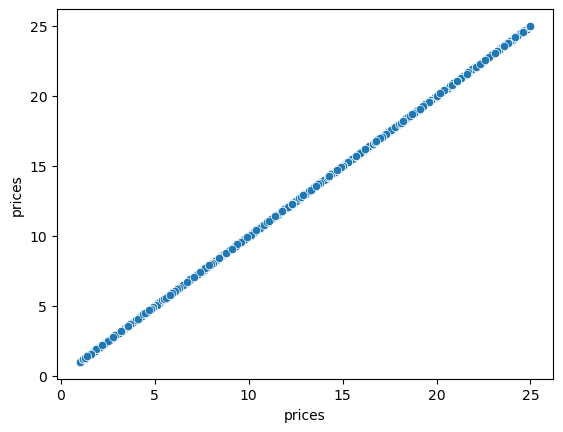

In [26]:
# let's try to make the histogram again
sns.scatterplot(ords_prods_merge, x = 'prices', y = 'prices')


/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prices', ylabel='Count'>

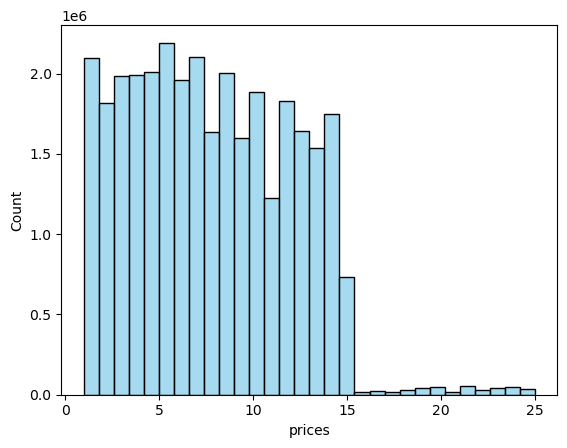

In [27]:
# Create a histogram using seaborn
sns.histplot(data=ords_prods_merge, x='prices', bins=30, color='skyblue')

<Axes: ylabel='Frequency'>

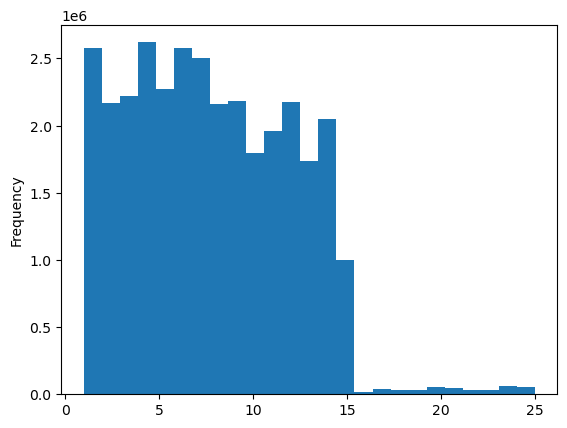

In [28]:
# using matplotlib
ords_prods_merge['prices'].plot.hist(bins=25)

To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70.   
This will result in a histogram with more, thinner columns:

/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prices', ylabel='Count'>

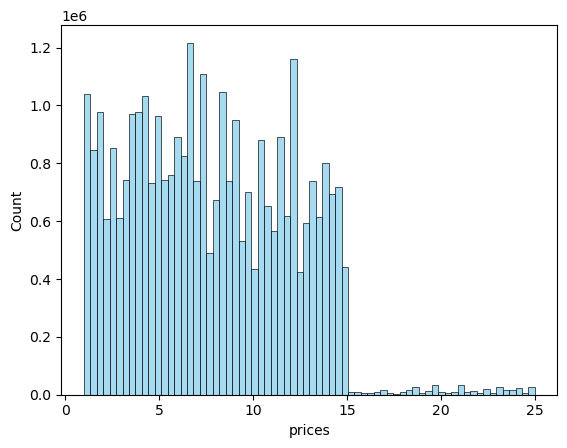

In [29]:
sns.histplot(data=ords_prods_merge, x='prices', bins=70, color='skyblue')

### Exporting the Histrogram

/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


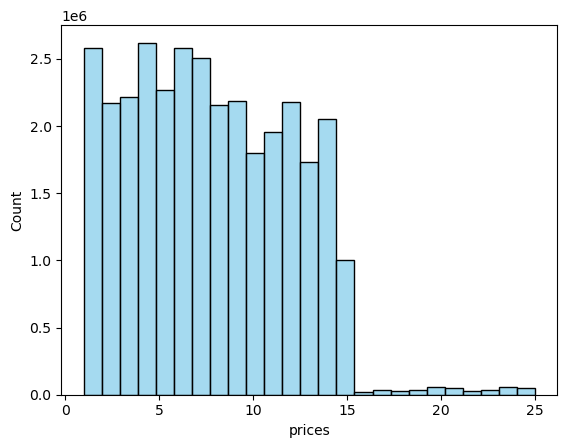

In [30]:
hist = sns.histplot(data=ords_prods_merge, x='prices', bins=25, color='skyblue')

In [31]:
hist.figure.savefig(os.path.join(path_vidz, 'hist_orders_dow.png'))

### Creating Line Charts  

Line charts are traditionally used to visualize the development of a characteristic over time.  
Since you don’t have dates that could indicate a timeline in your Instacart data, you won’t be able to test this out on your project just yet.  
You could, however, test out a different type of line chart, such as the development of the `prices` column across the days of the week.  
To achieve this, you’d plot the `orders_day_of_week` column on the x-axis and the `prices` column on the y-axis.  

One major caveat: this line chart will require a great deal of computing power due to the number of unique values in the “prices” column. As such, you’re likely to get a memory error and/or have your browser crash

#### Sampling Data  
You might consider only plotting the top or bottom 2,000,000 rows of your dataframe.  
But does this work? The answer is, well, **no**. That’s because this subset wouldn’t be representative of the entire population. How, then, do you tackle a problem like this?  
The answer is simple: **sampling**!  
  
You can split your dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split. If done correctly, both samples would have an equal proportion of data. In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows.  

This is a standard approach in machine learning. When training a model, you’d normally use 80 percent of a data set to train the algorithm and the remaining 20 percent to check the accuracy of the model.  
  

Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio. 


In [32]:
# set the seed to make the random list riproducible
np.random.seed(4)
# return an Array of random values based on the dimensions provided rand(d0,d1,d2...)
dev = np.random.rand(len(ords_prods_merge))
print(dev)

[0.96702984 0.54723225 0.97268436 ... 0.43122859 0.4262148  0.17866197]


In [33]:
# we can return an Array of boolean by specifyig a condition, in this case 0.7 since we want 70% of the data randomized
# the True or False will be based on the random values created above 
dev = dev <= 0.7
dev

array([False,  True, False, ...,  True,  True,  True])

How can you use your list to split your dataframe into two samples?

In [34]:
# store 70% of data
big_sample = ords_prods_merge.loc[dev]

# store 30% of data
small_sample = ords_prods_merge.loc[~dev]

In [35]:
# check if any row has null values
ords_prods_merge[ords_prods_merge.isna().any(axis=1)]

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag
347,43,21553,6,1,39630,14,5,17,4.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,regular_days,average_orders,14,regular_customer,high_spender,frequent_customer
9177,950,21553,20,0,187854,16,1,11,16.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,busiest_days,most_orders,30,regular_customer,high_spender,regular_customer
10798,1115,21553,14,1,168014,15,6,14,30.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,regular_days,most_orders,21,regular_customer,high_spender,frequent_customer
11147,1155,21553,18,1,103747,22,1,13,12.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,busiest_days,most_orders,27,regular_customer,high_spender,frequent_customer
11769,1220,21553,19,0,23475,3,0,17,26.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,busiest_days,average_orders,3,new_customer,high_spender,regular_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399788,3420548,21553,5,1,146887,3,4,11,7.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,slowest_days,most_orders,20,regular_customer,high_spender,frequent_customer
32400331,3420604,21553,8,0,159443,8,2,13,6.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,regular_days,most_orders,56,loyal_customer,high_spender,frequent_customer
32400992,3420676,21553,10,0,202268,50,5,16,6.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,regular_days,most_orders,54,loyal_customer,high_spender,frequent_customer
32402475,3420827,21553,2,0,15643,1,1,10,-1.0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,High-Range,busiest_days,most_orders,14,regular_customer,high_spender,regular_customer


In [36]:
ords_prods_merge['prices'].unique()

array([11.3, 13.4,  3.6,  8.4, 13.7, 10.7, 11.5,  7.5, 11.8,  5.3, 10. ,
        8.2,  6.6,  6.9,  9.1, 12.4, 11.1,  2. , 12.2,  8.7,  1.8,  5. ,
        7. ,  5.5, 10.2, 10.3,  4.1, 14.3,  4.4,  9.2,  7.4,  9.3, 13.6,
       13.5, 10.6,  4.3,  4.7,  1.6,  1.1, 10.5, 10.9,  8.6,  4. ,  7.3,
       14.4,  3.5, 12.3,  3.7,  2.4,  6.1, 11.4,  5.7, 14.5,  3.8,  7.6,
       12.1,  4.5,  6.3,  1.2, 10.8, 20.1,  3.2,  8.3,  3.4, 11.6,  4.2,
        5.2,  9.7, 15. ,  4.6,  5.9,  8. ,  2.6,  2.2, 14.2,  9. ,  3. ,
       12. ,  6.8, 12.8,  2.3, 11. , 14. ,  1.9,  4.9,  7.2,  2.5,  7.1,
        8.5,  6.7,  6.5,  1.4, 12.9,  5.8, 13.9,  9.4,  7.9, 11.2,  2.1,
        8.8,  9.8, 12.7, 13.8, 10.4,  7.8, 14.7, 23.8,  8.9,  5.1,  5.6,
        4.8,  6.2, 24.9,  2.7,  1.3,  8.1,  3.1,  6. ,  7.7,  9.5, 13.2,
        9.6, 13. , 14.8,  2.8, 16.9, 14.6,  3.3,  2.9,  5.4,  nan, 12.6,
       13.1,  3.9, 14.1, 11.9, 13.3,  6.4, 18.2,  9.9, 11.7, 12.5, 19.4,
       14.9,  1.7,  1. , 10.1, 21.1, 17.3, 21.3, 22

In [37]:
# the two samples contains all the original rows
len(big_sample) + len(small_sample) == len(ords_prods_merge)

True

As one last step before creating that chart, let’s do something that will speed up the processing time even further—reducing your samples to only those columns necessary for the chart, namely `prices` and `orders_day_of_week`.

In [38]:
small_sample.head(1)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,price_label,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,Mid-Range,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer


In [39]:
df_2 = small_sample[['orders_day_of_week', 'prices']]


In [40]:
df_2.head(2)

,orders_day_of_week,prices
0,5,11.3
2,5,3.6


/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


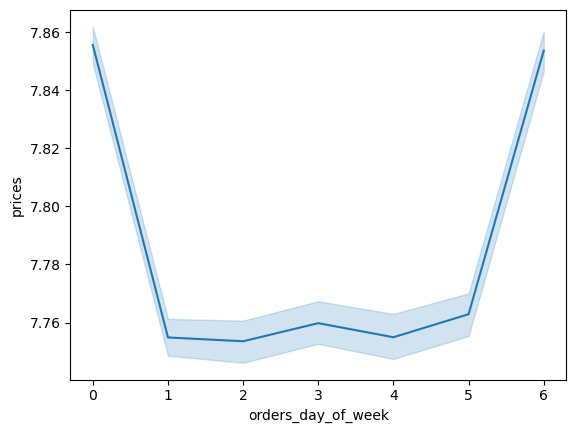

In [41]:
# draw line chart
line = sns.lineplot(data=df_2, x = 'orders_day_of_week', y = 'prices')

You may be wondering what those translucent blue bands are around your line. Those are called error bands, and they represent the chart’s confidence intervals. In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.  
  
How do you know for a fact that the new line chart you’ve created is representative of the population? Remember this is the line graph drawn from a sample that is 30% of all data.  
The best way to check is to compare the line chart of your subset with the line chart of the entire dataframe (or even the big sample).